<h2>Importe</h2>

In [1]:
import pickle

import numpy
import pandas as pd
import numpy as np
import os
import src.data as data
import torch
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import math


<h2>Methoden</h2>

In [2]:
#Straight up stolen from main.py
def calc_roc_auc(gts, probs):
    try:
        auc = metrics.roc_auc_score(gts, probs)
        if np.isnan(auc):
            auc = 0
        return auc
    except:
        print("except")
        return 0


In [3]:
def map_value(value):
    if value >= 0.5:
        return 1
    else:
        return 0

<h2>Laden der gespeicherten Daten und der Modelle</h2>

In [4]:
data_list = []
with open(r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\data_plot\test_data", "rb") as input:
    while True:
        try:
            x = pickle.load(input)
        except EOFError:
            break
        data_list.append(x)



In [5]:
len(data_list)

5

In [6]:
model_list = []
dir = r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\model"
for file in os.listdir(dir):
    filename = os.fsdecode(file)
    if "_15" in filename:
        model_list.append(torch.load(dir + "\\" + file))


In [32]:
type(model_list[0])

KeyboardInterrupt: 

In [8]:
lowest_len = math.inf
for ds in data_list:
    if len(ds["x_test_seq"]) < lowest_len:
        lowest_len = len(ds["x_test_seq"])


In [9]:
lowest_len

183

In [10]:
(data_list[0]["x_test_seq"][5:10])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [11]:
def getPrefixLength(seq, sample):
    counter = 0
    rowCounter = -1
    lastRow = None
    actualPrefixRows = 0
    for matrix in seq[sample,:,:]:
        #print(matrix)
        rowCounter += 1

        notZero = False

        for x in matrix:
            x = float(x)
            if x != 0:
                notZero = True
                break

        if notZero:
            lastRow = matrix
            actualPrefixRows = rowCounter

    if lastRow != None:
        for entry in lastRow:
            if entry == 0:
                counter += 1

            if entry != 0:
                counter += 1
                break

    #print(actualPrefixRows)
    #print(counter)
    #print(rowCounter)
    #print(lastRow)

    #return counter + (actualPrefixRows * len(lastRow))  #Every Value counts into the prefix size
    return actualPrefixRows +1 #Every Row counts into the prefix size

In [12]:
getPrefixLength((torch.from_numpy(data_list[0]["x_test_seq"])), 0)
torch.from_numpy(data_list[0]["x_test_seq"])[0,:,:]
#torch.from_numpy(data_list[0]["x_test_seq"])[0]

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [14]:
def getPrefixDictionary(seq):
    samples = seq.shape[0]
    print(samples)

    mapList = []
    uniquePrefixSizes = []
    for t in range(0, samples):
        indexPrefixSizeMap = {"index" : t, "prefixSize" : getPrefixLength(seq, t)}
        #print("sample " + str(t) + ": " + str(getPrefixLength(seq, t)))
        mapList.append(indexPrefixSizeMap)
        uniquePrefixSizes.append(getPrefixLength(seq, t))

    uniquePrefixSizes = set(uniquePrefixSizes)
    #print(uniquePrefixSizes)

    prefixDictionaryList = []

    for prefixSize in uniquePrefixSizes:
        prefixDictionary = {}
        prefixDictionary["prefixSize"] = prefixSize
        prefixDictionary["indizes"] = []
        for entry in mapList:
            if entry["prefixSize"] == prefixSize:
                prefixDictionary["indizes"].append(entry["index"])
        prefixDictionaryList.append(prefixDictionary)

    #print(prefixDictionary)
    return prefixDictionaryList


In [15]:
print(getPrefixDictionary((torch.from_numpy(data_list[0]["x_test_seq"]))))

183
[{'prefixSize': 1, 'indizes': [0, 16, 33, 44, 47, 62, 72, 80, 88, 94, 106, 114, 125, 133, 136, 151, 156, 169]}, {'prefixSize': 2, 'indizes': [1, 17, 34, 45, 48, 63, 73, 81, 89, 95, 107, 115, 126, 134, 137, 152, 157, 170]}, {'prefixSize': 3, 'indizes': [2, 18, 35, 46, 49, 64, 74, 82, 90, 96, 108, 116, 127, 135, 138, 153, 158, 171]}, {'prefixSize': 4, 'indizes': [3, 19, 36, 50, 65, 75, 83, 91, 97, 109, 117, 128, 139, 154, 159, 172]}, {'prefixSize': 5, 'indizes': [4, 20, 37, 51, 66, 76, 84, 85, 92, 98, 110, 118, 129, 140, 155, 160, 173]}, {'prefixSize': 6, 'indizes': [5, 21, 38, 52, 67, 77, 93, 99, 111, 119, 130, 141, 161, 174]}, {'prefixSize': 7, 'indizes': [6, 22, 39, 53, 68, 78, 86, 100, 112, 120, 131, 142, 162, 175]}, {'prefixSize': 8, 'indizes': [7, 23, 40, 54, 69, 79, 87, 101, 113, 121, 132, 143, 163, 176]}, {'prefixSize': 9, 'indizes': [8, 24, 41, 55, 70, 102, 122, 144, 164, 177]}, {'prefixSize': 10, 'indizes': [9, 25, 42, 56, 71, 103, 123, 145, 165, 178]}, {'prefixSize': 11, '

In [16]:
getPrefixLength((torch.from_numpy(data_list[0]["x_test_seq"])), 10)

11

In [67]:
result = []

for model, dataset in zip(model_list,data_list):
    values = {"model" : dataset["fold"], "data" : []}

    seq = torch.from_numpy(dataset["x_test_seq"])
    stat = torch.from_numpy(dataset["x_test_stat"])
    label = torch.from_numpy(dataset["label"]).numpy()

    prefixLengthDictList = getPrefixDictionary(seq)

    for prefixLengthDict in prefixLengthDictList:
        performancePrefixDict = {"PrefixLength" : prefixLengthDict["prefixSize"]}

        prefixSeq = seq[prefixLengthDict["indizes"],:,:]
        prefixStat = stat[prefixLengthDict["indizes"],:]
        prefixLabel = label[prefixLengthDict["indizes"]]

        model.eval()
        with torch.no_grad():

            prediction = torch.sigmoid(model.forward(prefixSeq, prefixStat))
            prediction = prediction.numpy()
            #prediction = [prediction[0][0] for pred in prediction]
            #prediction = [map_value(prediction[0]) for pred in prediction]

            #print(len(prediction))
            #print(len(prefixLabel))

            performancePrefixDict["AUC"] = calc_roc_auc(prefixLabel, prediction)
            #print(len(set(prefixLabel) - set(prediction)))

            #rocauc = metrics.roc_auc_score(prefixLabel, prediction)
            #print(rocauc)
            #performancePrefixDict["AUC"] = rocauc

            values["data"].append(performancePrefixDict)

    result.append(values)


183
except
except
except
except
except
except
except
except
except
194
except
except
except
except
except
except
except
except
except
except
185
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
197
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except
191
except
except
except
except
except
except
except
except
except
except
except
except
except
except
except


    PrefixLength       AUC
0            1.0  0.029412
1            2.0  0.029412
2            3.0  0.029412
3            4.0  0.033333
4            5.0  0.031250
5            6.0  0.038462
6            7.0  0.038462
7            8.0  0.038462
8            9.0  0.000000
9           10.0  0.000000
10          11.0  0.000000
11          12.0  0.000000
12          13.0  0.000000
13          14.0  0.000000
14          15.0  0.000000
15          16.0  0.000000
    PrefixLength       AUC
0            1.0  0.235294
1            2.0  0.235294
2            3.0  0.277778
3            4.0  0.187500
4            5.0  0.235294
5            6.0  0.133333
6            7.0  0.000000
7            8.0  0.000000
8            9.0  0.000000
9           10.0  0.000000
10          11.0  0.000000
11          12.0  0.000000
12          13.0  0.000000
13          14.0  0.000000
14          15.0  0.000000
   PrefixLength AUC
0             1   0
1             2   0
2             3   0
3             4   0
4        

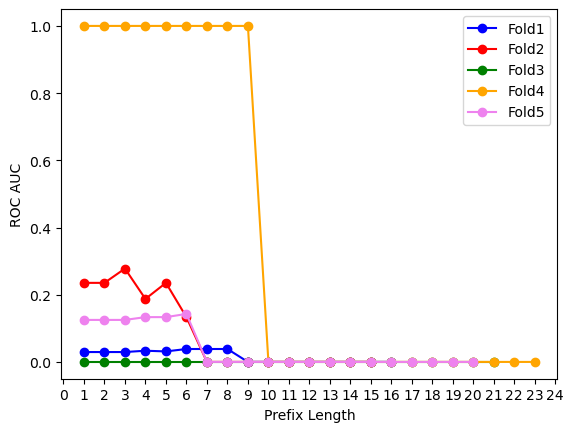

In [68]:
colors = ["blue", "red", "green", "orange", "violet"]
fig = plt.figure()

for values, c in zip(result, colors):

    data = values["data"]
    df = pd.DataFrame(columns= ["PrefixLength", "AUC"])
    for i in range(0,len(data) -1):
        x = (data[i]["PrefixLength"])
        y = (data[i]["AUC"])
        df.loc[i] = (x,y)
        #print(data[i]["PrefixLength"])


    #plt.plot(x, y, label = values["model"])
    df = df.sort_values(by=["PrefixLength"])
    plt.plot(df["PrefixLength"], df["AUC"], color = c, label = "Fold" + str(values["model"] + 1), marker = "o")
    print(df)

plt.xlabel("Prefix Length")
plt.ylabel("ROC AUC")
plt.xticks(range(0,25))
plt.legend()
plt.show()